### Recommandation System for the E commerce 

## 1. Project Proposal 

##### Objective:
To build a Recommendation System for E-commerce using sentiment analysis on product reviews. The goal is to classify user reviews as positive or negative and use this sentiment classification to enhance product recommendations and customer experience.

##### Problem Statement:
E-commerce platforms host thousands of products and millions of reviews. It’s difficult for users to judge a product’s quality at a glance. Our goal is to leverage Natural Language Processing (NLP) and Machine Learning (ML) to build a system that identifies customer sentiment and uses this data to improve recommendations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import pickle
import os

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


nltk.download('stopwords')


print("Loading dataset...")
rawData = pd.read_csv("Reviews.csv")
rawData = rawData[['Text', 'Score']].dropna()
rawData = rawData[rawData['Score'] != 3]  # Remove neutral reviews
rawData['Sentiment'] = rawData['Score'].apply(lambda score: 1 if score > 3 else 0)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohdx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading dataset...


In [3]:
stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def cleanText(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    stemmedWords = [stemmer.stem(word) for word in words if word not in stopWords]
    return ' '.join(stemmedWords)

print("Cleaning text...")
rawData['CleanedText'] = rawData['Text'].apply(cleanText)

Cleaning text...


Running EDA...


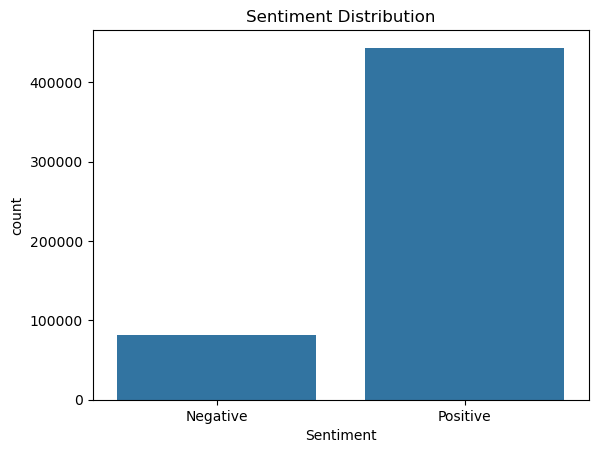

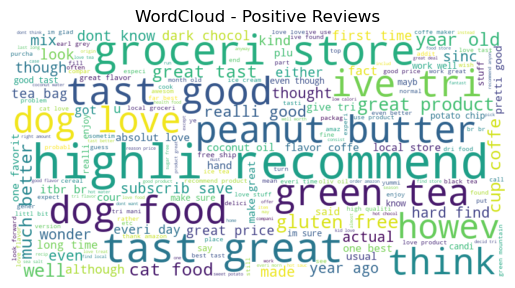

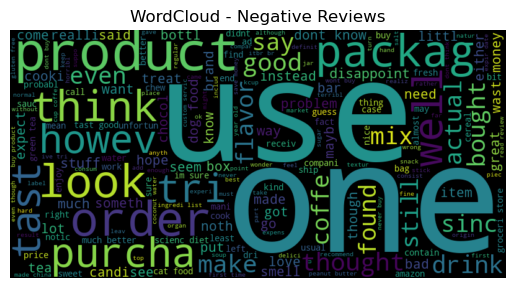

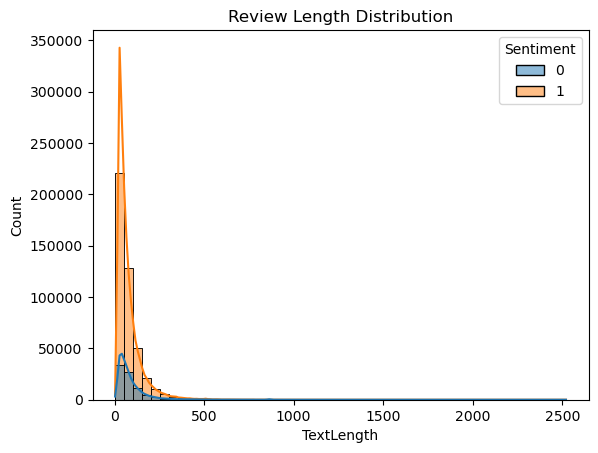

<Figure size 640x480 with 0 Axes>

In [5]:
def runEda():
    print("Running EDA...")
    os.makedirs("eda_outputs", exist_ok=True)

    sns.countplot(x='Sentiment', data=rawData)
    plt.title("Sentiment Distribution")
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.savefig("eda_outputs/sentiment_distribution.png")
    plt.show()
    plt.clf()

    positiveText = ' '.join(rawData[rawData['Sentiment'] == 1]['CleanedText'].tolist())
    wordCloudPos = WordCloud(width=800, height=400, background_color='white').generate(positiveText)
    plt.imshow(wordCloudPos, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud - Positive Reviews")
    plt.savefig("eda_outputs/wordcloud_positive.png")
    plt.show()
    plt.clf()

    negativeText = ' '.join(rawData[rawData['Sentiment'] == 0]['CleanedText'].tolist())
    wordCloudNeg = WordCloud(width=800, height=400, background_color='black').generate(negativeText)
    plt.imshow(wordCloudNeg, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud - Negative Reviews")
    plt.savefig("eda_outputs/wordcloud_negative.png")
    plt.show()
    plt.clf()

    rawData['TextLength'] = rawData['Text'].apply(lambda text: len(str(text).split()))
    sns.histplot(data=rawData, x='TextLength', hue='Sentiment', bins=50, kde=True)
    plt.title("Review Length Distribution")
    plt.savefig("eda_outputs/review_length_distribution.png")
    plt.show()
    plt.clf()

runEda()


In [7]:
X = rawData['CleanedText']
y = rawData['Sentiment']
tfidfVectorizer = TfidfVectorizer(max_features=5000)
XVectorized = tfidfVectorizer.fit_transform(X)

XTrain, XTest, yTrain, yTest = train_test_split(XVectorized, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB()
}

for modelName, modelInstance in models.items():
    print(f"Training {modelName}...")
    modelInstance.fit(XTrain, yTrain)
    yPred = modelInstance.predict(XTest)

    print(f"\n--- {modelName} ---")
    print("Accuracy:", accuracy_score(yTest, yPred))
    print(classification_report(yTest, yPred))

    cm = confusion_matrix(yTest, yPred)
    cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmDisplay.plot()
    plt.title(f"Confusion Matrix - {modelName}")
    plt.savefig(f"eda_outputs/confusion_matrix_{modelName.replace(' ', '_')}.png")
    plt.clf()

Training Logistic Regression...

--- Logistic Regression ---
Accuracy: 0.9281496343771098
              precision    recall  f1-score   support

           0       0.83      0.67      0.74     16379
           1       0.94      0.98      0.96     88784

    accuracy                           0.93    105163
   macro avg       0.89      0.82      0.85    105163
weighted avg       0.92      0.93      0.92    105163

Training Naive Bayes...

--- Naive Bayes ---
Accuracy: 0.8782746783564561
              precision    recall  f1-score   support

           0       0.91      0.24      0.38     16379
           1       0.88      1.00      0.93     88784

    accuracy                           0.88    105163
   macro avg       0.89      0.62      0.66    105163
weighted avg       0.88      0.88      0.85    105163



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
print("Tuning Logistic Regression...")
paramGrid = {'C': [0.1, 1, 10]}
gridSearch = GridSearchCV(LogisticRegression(max_iter=200), paramGrid, cv=3)
gridSearch.fit(XTrain, yTrain)

print("Best Parameters:", gridSearch.best_params_)
print("Best Score:", gridSearch.best_score_)


with open('logistic_model.pkl', 'wb') as modelFile:
    pickle.dump(gridSearch.best_estimator_, modelFile)

with open('vectorizer.pkl', 'wb') as vectorizerFile:
    pickle.dump(tfidfVectorizer, vectorizerFile)

print("Model and vectorizer saved.")


Tuning Logistic Regression...
Best Parameters: {'C': 10}
Best Score: 0.9280234683859065
Model and vectorizer saved.


### Scope
Analyze customer reviews from the Amazon Fine Food Reviews dataset.

Clean and preprocess review text using NLP techniques.

Perform sentiment analysis by classifying reviews as positive or negative.

Train and evaluate machine learning models to predict sentiment.

Prepare the model for potential use in a product recommendation system.

### Deliverables
Preprocessed dataset with sentiment labels.

EDA visuals: sentiment distribution, word clouds, review lengths.

Trained models (Logistic Regression, Naive Bayes) with performance reports.

Tuned and saved model and TF-IDF vectorizer files.

Final project presentation summarizing approach, results, and insights.

